In [1]:
import synthx as sx

### Normal

In [2]:
df = sx.sample(
    n_units=20,
    n_time=50,
    n_observed_covariates=3,
    n_unobserved_covariates=1,
    intervention_units=1,
    intervention_time=40,
    intervention_effect=1,
    seed=42,
)

In [3]:
dataset = sx.Dataset(
    df,
    unit_column = 'unit',
    time_column = 'time',
    y_column = 'y',
    covariate_columns = ['covariate_1', 'covariate_2', 'covariate_3'],
    intervention_units=1,
    intervention_time=40,
)

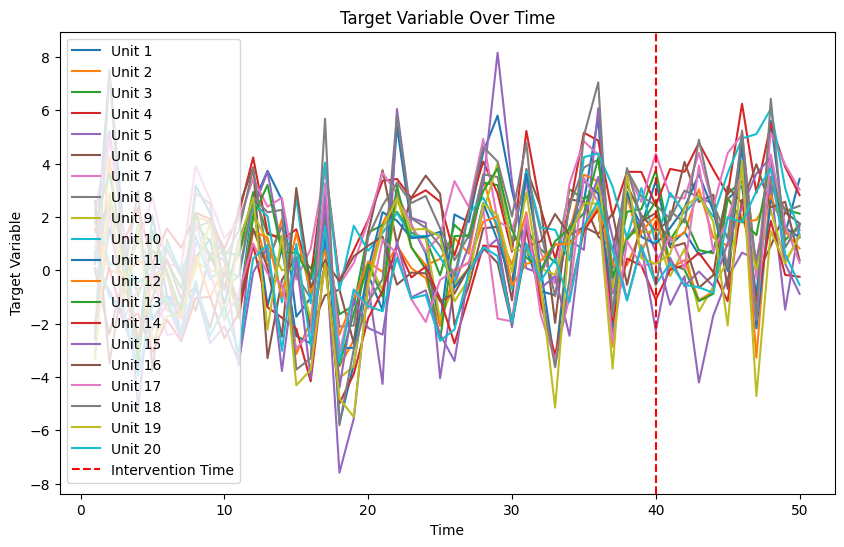

In [4]:
dataset.plot()

In [5]:
sc = sx.synthetic_control(dataset)

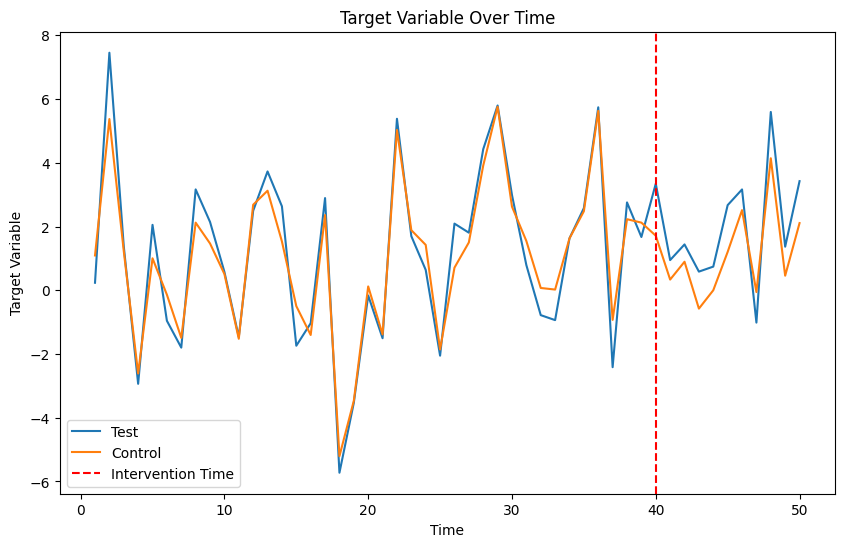

In [6]:
sc.plot()

In [7]:
sc.estimate_effects()

0.8398940936491993

### z score normalization

In [8]:
df = sx.sample(
    n_units=100,
    n_time=50,
    n_observed_covariates=3,
    n_unobserved_covariates=1,
    intervention_units=1,
    intervention_time=40,
    intervention_effect=10000,
    noise_effect=100,
    loc=100,
    scale=100,
    seed=42,
)

In [9]:
dataset = sx.Dataset(
    df,
    unit_column = 'unit',
    time_column = 'time',
    y_column = 'y',
    covariate_columns = ['covariate_1', 'covariate_2', 'covariate_3'],
    intervention_units=1,
    intervention_time=40,
    norm='z',
)

In [10]:
sc = sx.synthetic_control(dataset)

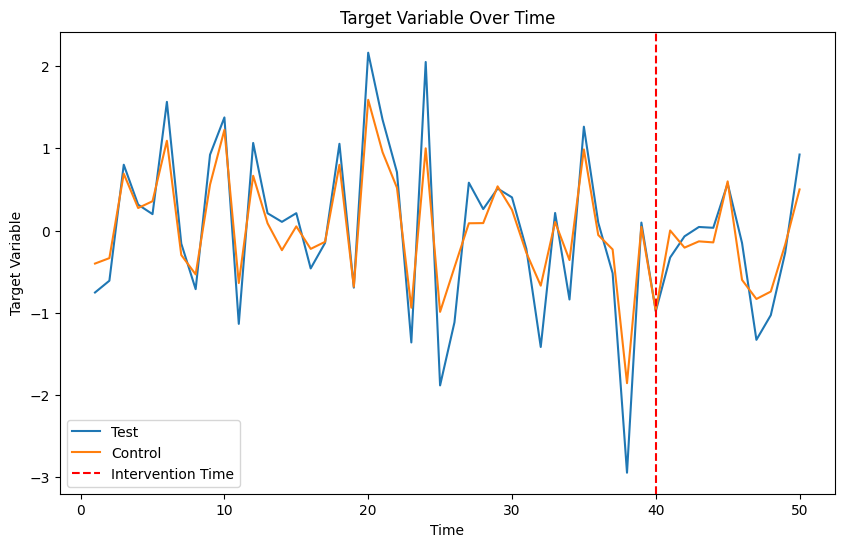

In [11]:
sc.plot()

In [12]:
sc.estimate_effects()

0.014137171285830022

### CV normalization

In [13]:
dataset = sx.Dataset(
    df,
    unit_column = 'unit',
    time_column = 'time',
    y_column = 'y',
    covariate_columns = ['covariate_1', 'covariate_2', 'covariate_3'],
    intervention_units=1,
    intervention_time=40,
    norm='cv',
)

In [14]:
sc = sx.synthetic_control(dataset)

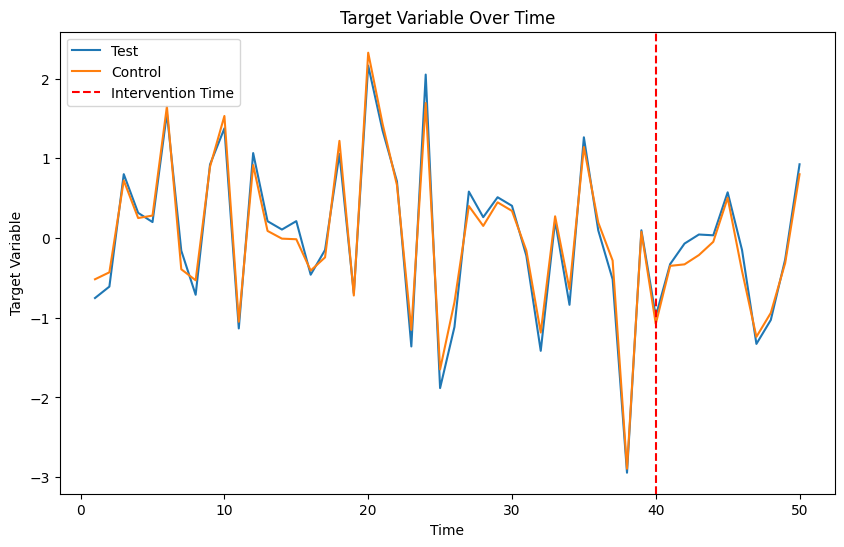

In [15]:
sc.plot()

In [16]:
sc.estimate_effects()

0.12166475356096539

### yeo-johnson normalization

In [17]:
dataset = sx.Dataset(
    df,
    unit_column = 'unit',
    time_column = 'time',
    y_column = 'y',
    covariate_columns = ['covariate_1', 'covariate_2', 'covariate_3'],
    intervention_units=1,
    intervention_time=40,
    norm='yeo_johnson',
)

In [18]:
sc = sx.synthetic_control(dataset)

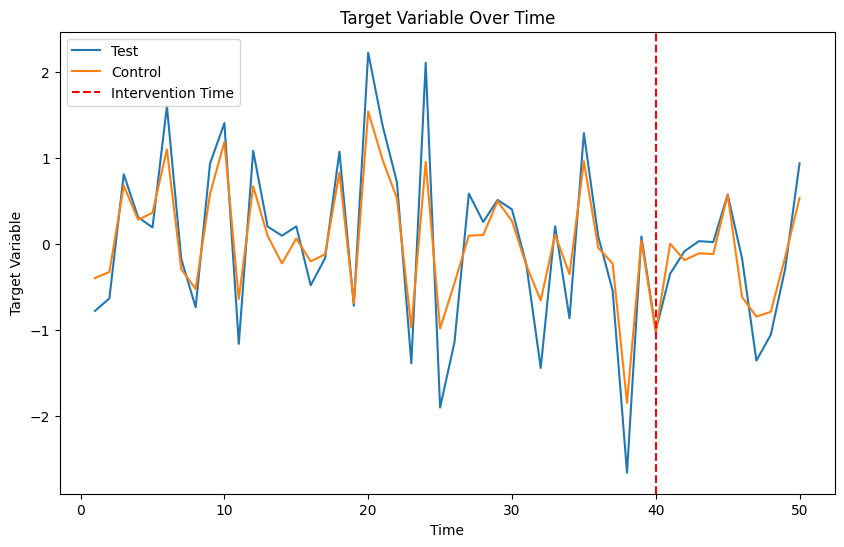

In [19]:
sc.plot()

In [20]:
sc.estimate_effects()

-0.00033655681855810553